# **The ninth in-class-exercise (20 points in total, 11/11/2020)**

The purpose of the exercise is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/INFO5731_FALL2020/blob/master/In_class_exercise/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
try:
    from xgboost import XGBClassifier
except ImportError ('Installing XGBoost...'):
    !pip install xgboost

In [2]:
# Write your code here
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [3]:
with open('exercise09_datacollection/stsa-train.txt') as fin:
    data = fin.readlines()
with open('exercise09_datacollection/stsa-test.txt') as fin:
    data.extend(fin.readlines())

In [4]:
target = [x[0] for x in data]
text = [x.strip()[2:] for x in data]

In [5]:
df = pd.DataFrame({'text' : text, 'target': target})
df.head()

,text,target
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


# Process Text

In [6]:
from nltk import word_tokenize
from string import punctuation

In [7]:
def remove_punctuation(row):
    return [w for w in row if w not in punctuation]

In [8]:
df.text = df.text.apply(word_tokenize)
df.text = df.text.apply(remove_punctuation)
df.text = df.text.apply(lambda x: [w.lower() for w in x])

In [9]:
X = df.text.apply(lambda x: ' '.join(x)).values
y = df.target.apply(lambda x: int(x)).values

In [10]:
# split the training data into training and validation sets
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                test_size=0.2, random_state=1)

# Cross Validation

In [11]:
naive_bayes = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
models = [naive_bayes, svc, knn, dt, rf, xgb]
names = ['nb', 'svc', 'knn', 'dt', 'rf', 'xgb']
estimators = []
for name, model in zip(names, models):
    clf = Pipeline([('vect', CountVectorizer()), (name, model)])
    estimators.append(clf)

In [12]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [13]:
scores = {name : None for name in names}
scoring = {'accuracy_score' : 'accuracy',
           'precision_score' : 'precision',
           'recall_score' : 'recall', 
           'f1_score' : 'f1'}
for name, clf in zip(names, estimators):
    scores[name] = cross_validate(clf, train_X, train_y, cv=cv, scoring=scoring)

# Find the Best Performing Algorithm

In [14]:
def get_dict():
    return {name : None for name in names}
accuracy_scores = get_dict()
precision_scores = get_dict()
recall_scores = get_dict()
f1_scores = get_dict()
estimator_names = list(scores.keys())
for name in scores.keys():
    for score, d in zip(['accuracy_score', 'precision_score',
                         'recall_score', 'f1_score'],
                        [accuracy_scores, precision_scores,
                         recall_scores, f1_scores]):
        score_name = 'test_' + score
        d[name] = scores[name][score_name]

In [15]:
def get_mean_scores(d):
    return [(name, np.mean(value)) for name, value in d.items()]    

In [16]:
accuracy_mean = get_mean_scores(accuracy_scores)
precision_mean = get_mean_scores(precision_scores)
recall_mean = get_mean_scores(recall_scores)
f1_mean = get_mean_scores(f1_scores)

In [17]:
from matplotlib import pyplot as plt

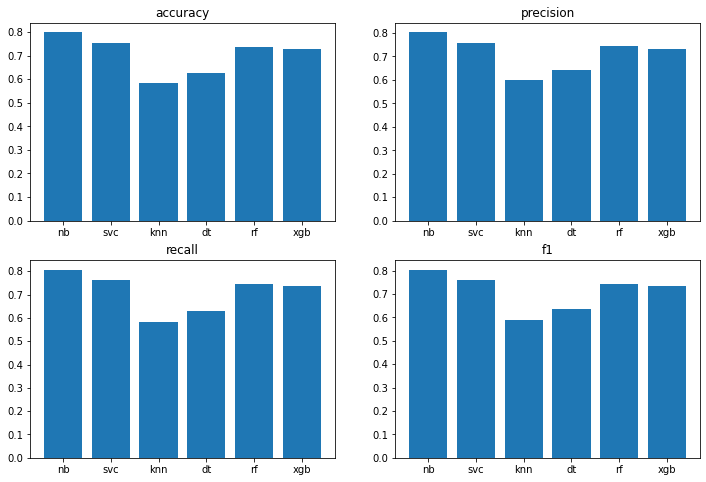

In [18]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 8)
axes = axes.flatten()
for ax, t, title in zip(axes, [accuracy_mean, precision_mean, recall_mean, f1_mean],
                 ['accuracy', 'precision', 'recall', 'f1']):
    ax.bar(range(len(names)), [mean for _, mean in t], tick_label=names)
    ax.set_title(title)

In [35]:
def print_mean_scores(t, scoring_name):
    for name, score in t:
        print(name, 'mean', scoring_name, 'score is', score)

In [36]:
for t, name in zip([accuracy_mean, precision_mean, recall_mean, f1_mean], 
                   ['accuracy', 'precision', 'recall', 'f1']):
    print_mean_scores(t, name)
    print('+'*79)

nb mean accuracy score is 0.7987723278152463
svc mean accuracy score is 0.7532918454935622
knn mean accuracy score is 0.5842460658082976
dt mean accuracy score is 0.6280036787247087
rf mean accuracy score is 0.7362712037604742
xgb mean accuracy score is 0.7266899652564888
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean precision score is 0.8027416942826898
svc mean precision score is 0.7587898786798248
knn mean precision score is 0.598329300018695
dt mean precision score is 0.6403984723812968
rf mean precision score is 0.7424685224073968
xgb mean precision score is 0.7333736520687197
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean recall score is 0.8071881770349737
svc mean recall score is 0.7632273290003095
knn mean recall score is 0.5815428659857628
dt mean recall score is 0.6307822655524605
rf mean recall score is 0.7462496131228722
xgb mean recall score is 0.7362356855462705
++++++++++++++++++++++++++++

# Test Result

Best performing algorithm is `MultinomialNB`

In [41]:
clf = Pipeline([('vect', CountVectorizer()), ('nb', MultinomialNB())])
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
print('Test accuracy score is: {}'.format(accuracy_score(test_y, predictions)))
print('Test precision score is: {}'.format(precision_score(test_y, predictions)))
print('Test recall score is: {}'.format(recall_score(test_y, predictions)))
print('Test F1 score is: {}'.format(f1_score(test_y, predictions)))

Test accuracy score is: 0.8078902229845626
Test precision score is: 0.829050279329609
Test recall score is: 0.8021621621621622
Test F1 score is: 0.8153846153846154
